> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
 I use the TMDb Movies Dataset to make my data analysis on it

### Question 
1-What is the most and the least profitable movie?
2-What is the top ten movies popularity?
3-What is lowest and highest movie cost?
4-What is the longest and shortest movies runtime?
5-Which month that have higher profit in movie?
6-Does popularity affects on profit?

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Loading Data

In [5]:

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Check  if data clean or not 

In [6]:
#the basic information about the data shows columns that contains null  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#the dimnesion of data
df.shape

(10866, 21)

In [8]:
#name of columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
#check duplication
df.duplicated().sum()

1

### Data Cleaning (remove unused data form the dataset)

>
>1. Remove the columns that I does not use it such as (id,'imdb_id',keywords,homepage,budget_adj', 'revenue_adj',tagline, overview,production_companies,vote_count and vote_average).
>2. Remove duplicated values.
>3. dealing with null values and zero.
>4. Changing format of popularity, budget and revenue columns.
>5. Changing release date column from string to date format.


#### 1-Remove the columns

In [10]:
droped_col=['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']
df.drop(droped_col,axis=1, inplace=True)

#### 2-Remove duplicated values

In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

#### 3-dealing with null values and zero.

In [12]:
#check null values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [13]:
#fill null with zero
df.fillna(0, inplace=True)

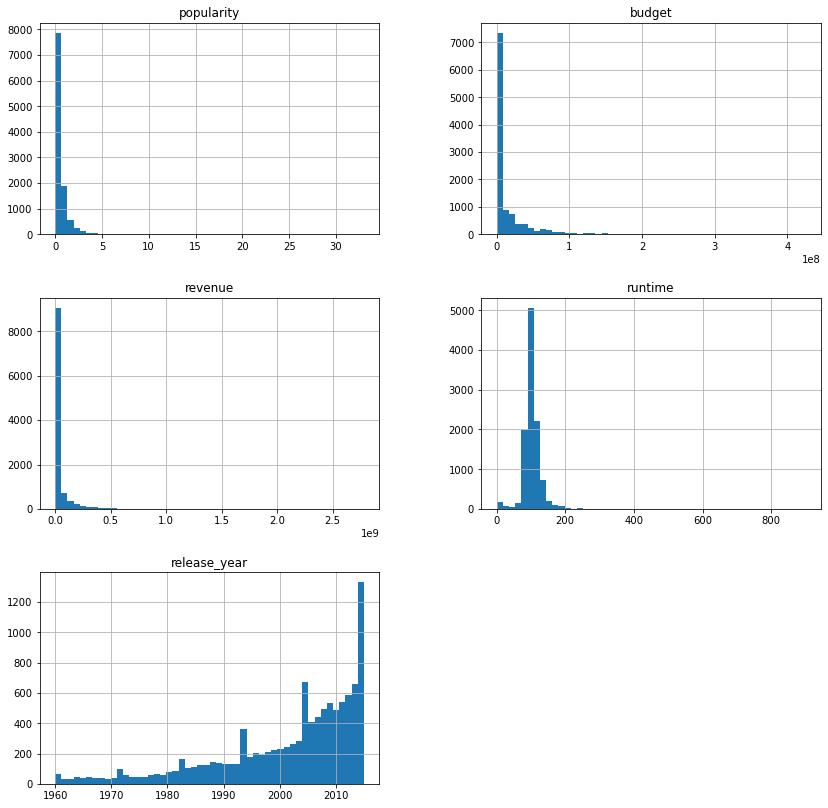

In [14]:
#Check the distribution of data
df.hist(figsize = (14,14), bins=50);

From the histogram illustrate that the revenue and budget columns have many zero value should be removed

In [15]:
#replace zero values to NAN in runtime, budget and revenue
df['runtime'] = df['runtime'].replace(0,np.NaN)
df['budget'] = df['budget'].replace(0,np.NaN)
df['revenue'] = df['revenue'].replace(0,np.NaN)

df.dropna(inplace =True)

#### 4-Change format of budget , revenue and popularity columns.

In [16]:
#change these columns to integer
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['budget'] = df['budget'].astype(int)


#### 5-Changing release date column from string to date format.

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the most and the least profitable movie?)

In [18]:
#to get most profit movie should create a new column called profit
df['profit'] = df['revenue'] - df['budget']
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


In [19]:
df.sort_values(['profit'], ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9,237000000,-2147483648,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,1910483648


In [20]:
#get the least profit movie
df[df['profit'] == df['profit'].min()]

#other method 
df.sort_values(['profit'], ascending=False).tail(1)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
2244,0,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


### Research Question 2  (What is the  top ten popularity movies ?)

In [21]:
top_ten = df.sort_values(['popularity'], ascending=False)
top_ten.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
629,24,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,2014-11-05,2014,456752480
630,14,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121.0,Action|Science Fiction|Adventure,2014-07-30,2014,603312399
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
1329,12,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,1977-03-20,1977,764398007
631,12,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136.0,Action|Adventure|Science Fiction,2014-03-20,2014,544766572
632,11,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101.0,Action|Thriller,2014-10-22,2014,58739897
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
633,10,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123.0,Science Fiction|Adventure|Thriller,2014-11-18,2014,627100229


### Research Question 3(What is lowest and highest movie cost?)

In [22]:
#find the most cost
df.sort_values(['budget'], ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
2244,0,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


In [23]:
#find the least cost
df.sort_values(['budget'], ascending=False).tail(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
3581,0,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90.0,Comedy|Romance,2011-06-03,2011,1377


### Research Question 4  (What is the longest and shortest movies runtime?)

In [24]:
df.describe()

,popularity,budget,revenue,runtime,release_year,profit
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03
mean,0.709912,3.720370e+07,1.064077e+08,109.220291,2001.261028,7.031841e+07
std,1.472446,4.220822e+07,1.750113e+08,19.922820,11.282575,1.482442e+08
min,0.000000,1.000000e+00,-2.147484e+09,15.000000,1960.000000,-4.139124e+08
25%,0.000000,1.000000e+07,1.356622e+07,95.000000,1995.000000,-1.321535e+06
50%,0.000000,2.400000e+07,4.478914e+07,106.000000,2004.000000,2.002019e+07
75%,1.000000,5.000000e+07,1.240253e+08,119.000000,2010.000000,8.170331e+07
max,32.000000,4.250000e+08,2.068178e+09,338.000000,2015.000000,1.910484e+09


<AxesSubplot:>

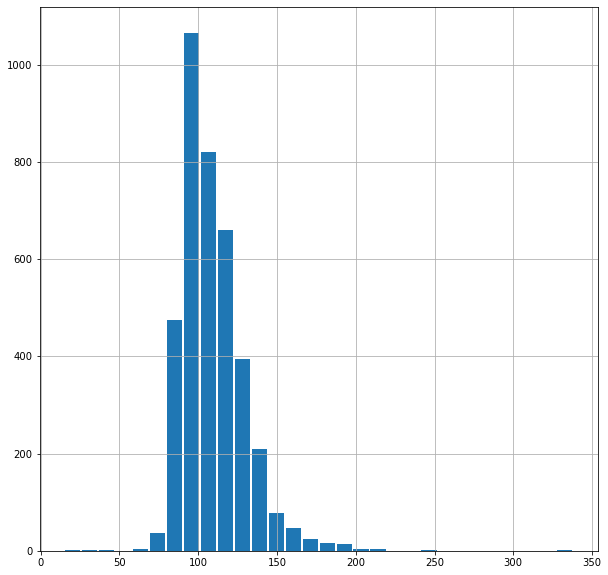

In [25]:
#plotting thee distribution of runtime
df['runtime'].hist(figsize = (10,10),rwidth = 0.9, bins = 30)

In [28]:
#function that calculate average
def avg_function(column):
    return df[column].mean()

In [30]:
#average for runtime column
print("The mean of runtime is: ", avg_function('runtime'))

The mean of runtime is:  109.22029060716139


> from the previous histogram show the median of runtime movies is approximatly  is 110 mintues that prove the statisitcs above and the skewessness of the data is positive and right

##### let's take another look on runtime by other plots such as box plot

Text(0.5, 1.0, 'Distribution of all movies')

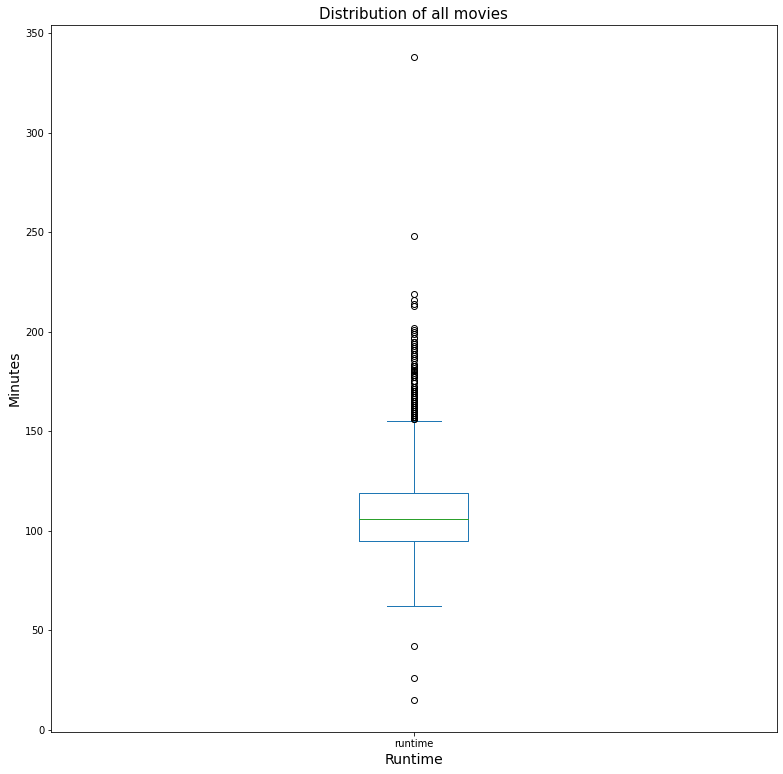

In [55]:
#creating boxplot for distribution of all movies
df['runtime'].plot(kind = 'box', figsize = (13,13));
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Runtime', fontsize=14)
plt.title('Distribution of all movies', fontsize=15)

In [56]:
#longest runtime
high = df[df['runtime']==df['runtime'].max()]
high

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
2107,0,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338.0,Crime|Drama|Thriller|History,2010-05-19,2010,-17128721


> the movie which called Carlos have longest runtime

In [57]:
low = df[df['runtime'] == df['runtime'].min()]
low

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
5162,0,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15.0,Science Fiction|Animation,2003-06-02,2003,-5


> the movie which called Carlos had shortest runtime

### Research Question 5  (Which months that have higher profits?)

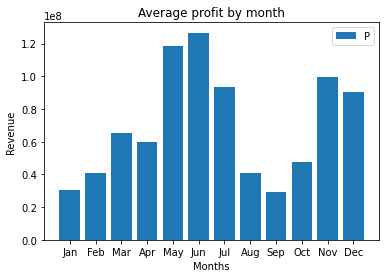

In [46]:
#month extraction
df['release_month'] = df['release_date'].dt.month
profit_by_month = df.groupby('release_month')['profit'].mean()

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(np.arange(0, 12), profit_by_month, tick_label = month)
plt.title('Average profit by month');
plt.ylabel('Revenue ');
plt.xlabel('Months');
plt.legend('Profit');



### Research Question  6 (Which years do movies made the most profits?)


In [47]:
profit_y = df.groupby('release_year')['profit'].sum()
profit_y.head(5)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: profit, dtype: float64

Text(0.5, 1.0, 'Total budgets vs Movie Years')

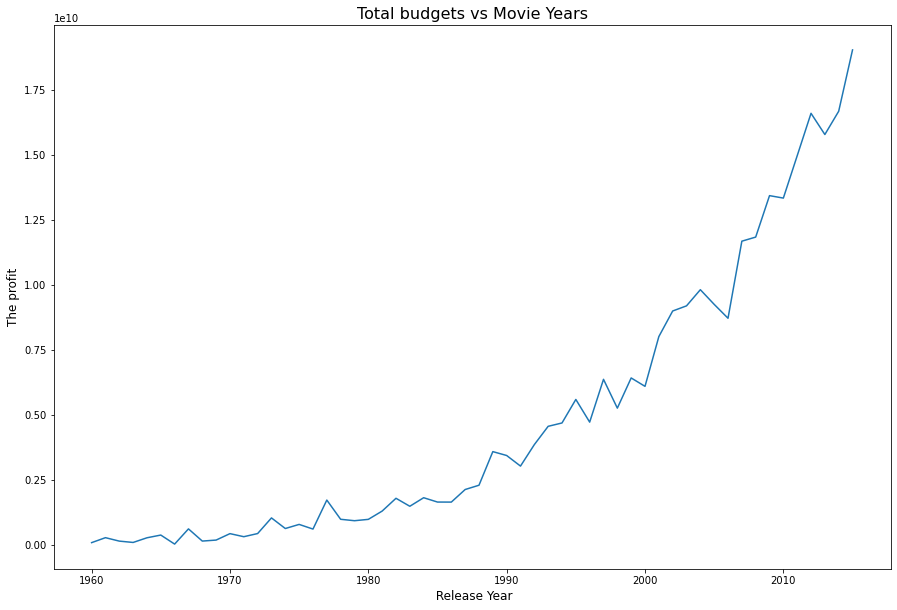

In [48]:
profit_y.plot(figsize=(15,10))
plt.xlabel(' Release Year', fontsize = 12)
plt.ylabel('The profit', fontsize = 12)
plt.title('Total budgets vs Movie Years', fontsize=16)


> when dealing with time interval the line chart is the optimal plot

### take a look about the relation between the revenue and budget

Text(0, 0.5, 'Budget')

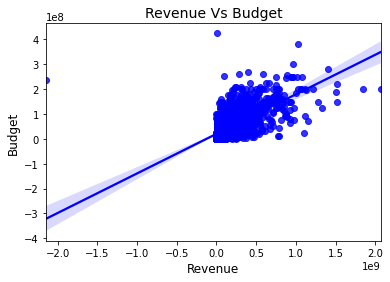

In [50]:
#create a scatter plot show the relation between revenue and budget
ax = sns.regplot(x=df['revenue'],y=df['budget'],color='blue')
ax.set_title("Revenue Vs Budget",fontsize=14)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)


From the scatter plot, there exist a a strong positive relationship between revenue and budget.

### Research Question  7 (What are the top casts and directors?)

In [31]:
# to inverstigate about cast should sperate all people in each moevie
df.loc[:,['original_title', 'cast', 'director']].head()

,original_title,cast,director
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan


In [38]:
#extract the some columns
def extract_data(col_name):
    df['cast']=df['cast'].astype(str)
    df['director']=df['director'].astype(str)
    
    #sperate column by |
    data = df[col_name].str.cat(sep = '|')
    
    #store the values as series
    data = pd.Series(data.split('|'))
    
    #order descending and start form the highest number 
    count = data.value_counts(ascending = False)
        
    return count
    
    

In [41]:
#for the cast
count_cast = extract_data('cast')
count_cast = pd.DataFrame(data=count_cast)

top = count_cast.head(10)
top

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Harrison Ford,34
Brad Pitt,34
Morgan Freeman,34
Sylvester Stallone,34


In [43]:
#for the director
count_director = extract_data('director')
count_director = pd.DataFrame(data=count_director)

top = count_director.head(10)
top

,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Steven Soderbergh,17
Martin Scorsese,17
Robert Rodriguez,17
Tim Burton,17
Oliver Stone,15
Robert Zemeckis,15


<a id='conclusions'></a>
## Conclusions

> After this fantastic analysis for TMDb dataset and abstract conclusions after each analysis or visualtion step here are my final findings:

> 1. the runtime average of 110.22 minutes from all movies
> 2. the most profitable movie is Avatar
> 3. the top popularity moevie is Jurassic World
> 4. there exist postive realtionship between popularity and profit
> 5. the profits and bugdgets increase by increasing in years
> 6. the most movie in run time is Carlos
> 7. the highest average profit by month is June
> 8. Top one cast is Robert De Niro
> 9. Top one director is Steven Spielberg

## Limitation

 There are several infomation removed such as rows contained 0 values and null values and this somehow affect on analysis and the accuracy. There should be a consistent and systematic ways to collect the information in order to make it useful for analysis the data.